In [152]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('darkgrid')

%matplotlib inline


## <u><strong> Importing Data </strong></u>

In [153]:
train_file_path=r"A:\DS ML\Big Mart Sales\train_v9rqX0R.csv"

test_file_path=r"A:\DS ML\Big Mart Sales\test_AbJTz2l.csv"

In [154]:
train=pd.read_csv(train_file_path)

test=pd.read_csv(test_file_path)

## <u><strong> Data Analysis </strong></u>

In [155]:
## Making copy of the data

train_df=train.copy()

test_df=test.copy()

In [156]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7295,FDQ44,20.500,Low Fat,0.036345,Fruits and Vegetables,122.3756,OUT017,2007,NaN,Tier 2,Supermarket Type1,2544.6876
5352,FDJ33,NaN,Regular,0.087894,Snack Foods,121.1730,OUT027,1985,Medium,Tier 3,Supermarket Type3,2586.6330
3084,FDU49,19.500,Regular,0.030819,Canned,86.0540,OUT018,2009,Medium,Tier 3,Supermarket Type2,2336.9580
2433,FDS28,NaN,Regular,0.082003,Frozen Foods,59.2588,OUT027,1985,Medium,Tier 3,Supermarket Type3,1374.2112
2216,FDT16,9.895,Regular,0.048761,Frozen Foods,260.5278,OUT045,2002,NaN,Tier 2,Supermarket Type1,8851.1452


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [158]:
train_df.drop('Item_Identifier',axis=1,inplace=True)

test_df.drop('Item_Identifier',axis=1,inplace=True)

In [159]:
train_df['Outlet_Establishment_Year']=train_df['Outlet_Establishment_Year'].apply(lambda x:str(x))

test_df['Outlet_Establishment_Year']=test_df['Outlet_Establishment_Year'].apply(lambda x:str(x))

In [160]:
print(f'Number of Rows and Columns in Training Data : {train.shape}')
print(" ")
print(f'Number of Rows and Columns in Test Data : {test.shape}')

Number of Rows and Columns in Training Data : (8523, 12)
 
Number of Rows and Columns in Test Data : (5681, 11)


In [161]:
cat_cols=[col for col in train_df.columns if train_df[col].dtype=='O']
num_cols=[col for col in train_df.columns if train_df[col].dtype!='O']

print(f'Categorical Columns : {cat_cols}')
print(" ")
print(f'Numerical Columns : {num_cols}')

Categorical Columns : ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
Numerical Columns : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [162]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [163]:
d={}
l=[]
l1=[]

for i in train_df.columns:
    d[i]=train_df[i].unique()
    l.append(train_df[i].nunique())
    l1.append(train_df[i].isna().sum())
    
explain_df=pd.DataFrame(data=d.items(),columns=['Features','Unique Records'])

In [164]:
explain_df['No. of Unique Records']=pd.Series(l)
explain_df['Missing Values']=pd.Series(l1)
explain_df['% Missing Values']=round((explain_df['Missing Values']/len(train))*100,2)

In [165]:
explain_df

,Features,Unique Records,No. of Unique Records,Missing Values,% Missing Values
0,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...",415,1463,17.17
1,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5,0,0.00
2,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880,0,0.00
3,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16,0,0.00
4,Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938,0,0.00
5,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10,0,0.00
6,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9,0,0.00
7,Outlet_Size,"[Medium, nan, High, Small]",3,2410,28.28
8,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3,0,0.00
9,Outlet_Type,"[Supermarket Type1, Supermarket Type2, Grocery...",4,0,0.00


In [166]:
for i in train_df.columns:
    x=train_df[train_df['Item_Outlet_Sales']==train_df['Item_Outlet_Sales'].max()][i]
    print(f'{i} of Item with Max Sales : {x}')
    print(" ")

Item_Weight of Item with Max Sales : 7188   NaN
Name: Item_Weight, dtype: float64
 
Item_Fat_Content of Item with Max Sales : 7188    Low Fat
Name: Item_Fat_Content, dtype: object
 
Item_Visibility of Item with Max Sales : 7188    0.010551
Name: Item_Visibility, dtype: float64
 
Item_Type of Item with Max Sales : 7188    Household
Name: Item_Type, dtype: object
 
Item_MRP of Item with Max Sales : 7188    234.9958
Name: Item_MRP, dtype: float64
 
Outlet_Identifier of Item with Max Sales : 7188    OUT027
Name: Outlet_Identifier, dtype: object
 
Outlet_Establishment_Year of Item with Max Sales : 7188    1985
Name: Outlet_Establishment_Year, dtype: object
 
Outlet_Size of Item with Max Sales : 7188    Medium
Name: Outlet_Size, dtype: object
 
Outlet_Location_Type of Item with Max Sales : 7188    Tier 3
Name: Outlet_Location_Type, dtype: object
 
Outlet_Type of Item with Max Sales : 7188    Supermarket Type3
Name: Outlet_Type, dtype: object
 
Item_Outlet_Sales of Item with Max Sales : 7188 

In [167]:
for i in train_df.columns:
    x=train_df[train_df['Item_Outlet_Sales']==train_df['Item_Outlet_Sales'].min()][i]
    print(f'{i} of Item with Minimum Sales : {x}')
    print(" ")

Item_Weight of Item with Minimum Sales : 906     9.500
6950    9.105
Name: Item_Weight, dtype: float64
 
Item_Fat_Content of Item with Minimum Sales : 906     Low Fat
6950    Low Fat
Name: Item_Fat_Content, dtype: object
 
Item_Visibility of Item with Minimum Sales : 906     0.000000
6950    0.064411
Name: Item_Visibility, dtype: float64
 
Item_Type of Item with Minimum Sales : 906     Soft Drinks
6950      Household
Name: Item_Type, dtype: object
 
Item_MRP of Item with Minimum Sales : 906     32.89
6950    33.39
Name: Item_MRP, dtype: float64
 
Outlet_Identifier of Item with Minimum Sales : 906     OUT010
6950    OUT010
Name: Outlet_Identifier, dtype: object
 
Outlet_Establishment_Year of Item with Minimum Sales : 906     1998
6950    1998
Name: Outlet_Establishment_Year, dtype: object
 
Outlet_Size of Item with Minimum Sales : 906     NaN
6950    NaN
Name: Outlet_Size, dtype: object
 
Outlet_Location_Type of Item with Minimum Sales : 906     Tier 3
6950    Tier 3
Name: Outlet_Locati

## <u><strong> Data Vizualization </strong></u>

### <u> Top 10 Categorical Features By Sales </u>

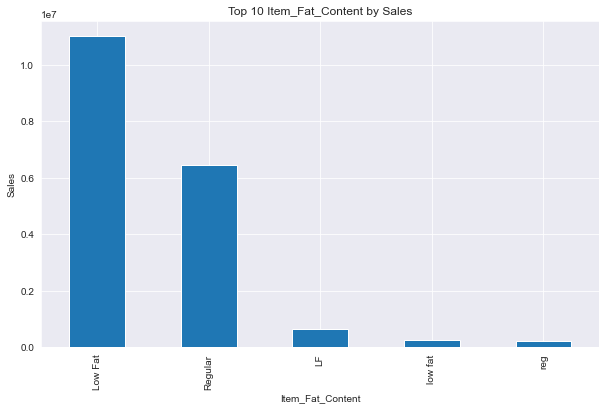

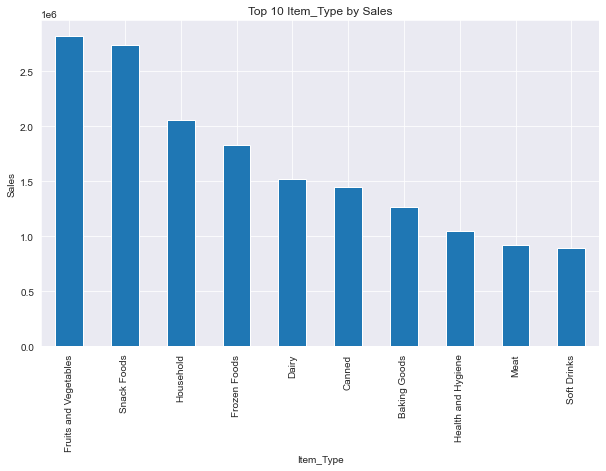

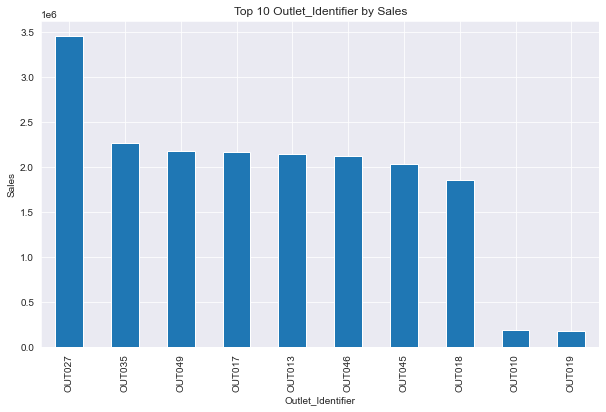

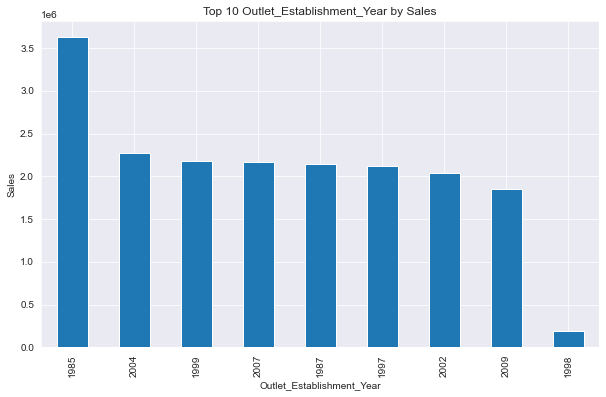

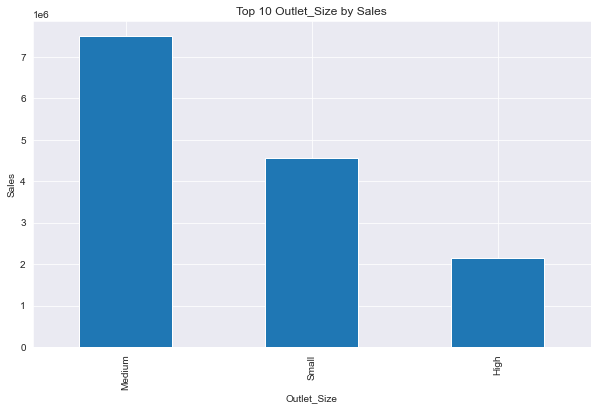

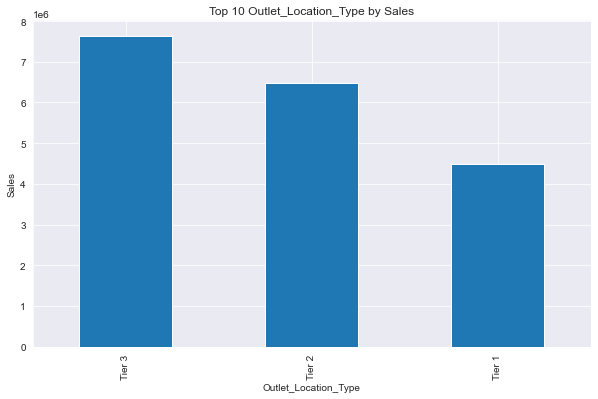

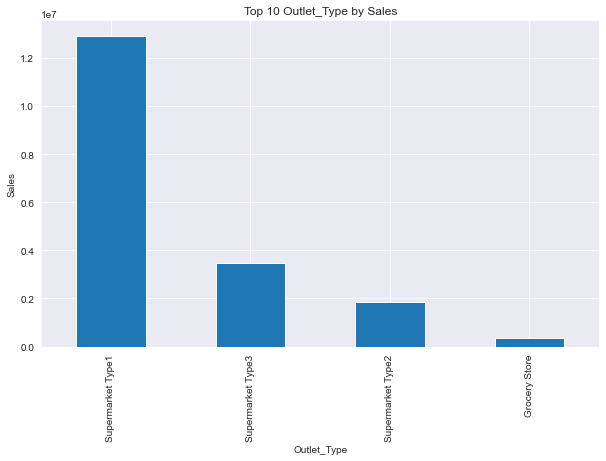

In [168]:
for i in cat_cols:
    plt.figure(figsize=(10,6))
    train_df.groupby(i).apply(lambda df:df['Item_Outlet_Sales'].sum()).sort_values(ascending=False).head(10).plot.bar()
    plt.title(f'Top 10 {i} by Sales')
    plt.xticks(rotation=90)
    plt.ylabel('Sales')

### <u> Least 10 Categorical Features By Sales </u>

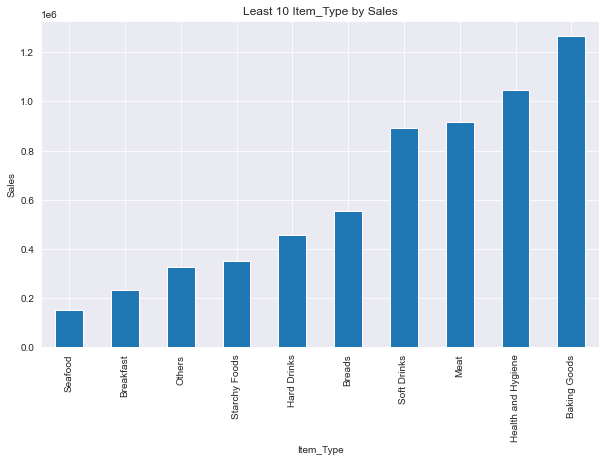

In [169]:
for i in cat_cols:
    if train_df[i].nunique()>10:
        plt.figure(figsize=(10,6))
        train_df.groupby(i).apply(lambda df:df['Item_Outlet_Sales'].sum()).sort_values(ascending=True).head(10).plot.bar()
        plt.title(f'Least 10 {i} by Sales')
        plt.xticks(rotation=90)
        plt.ylabel('Sales')
    else:
        pass

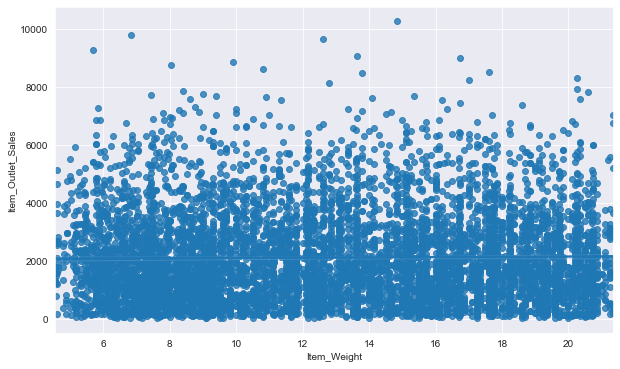

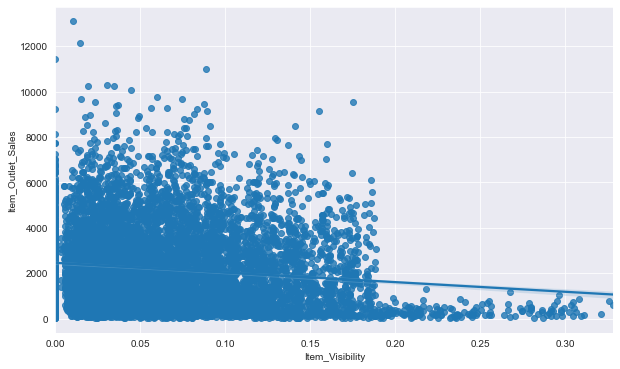

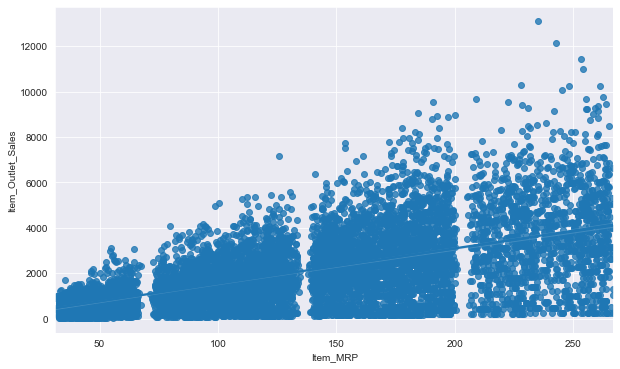

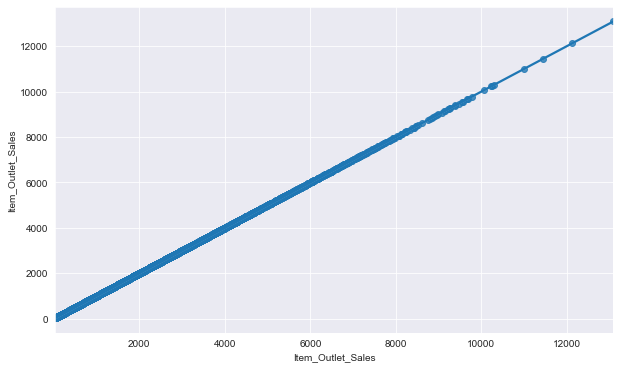

In [170]:
for i in num_cols:
    plt.figure(figsize=(10,6))
    sns.regplot(x=i,data=train,y='Item_Outlet_Sales')

### <u> Least Categorical Features by MRP </u>

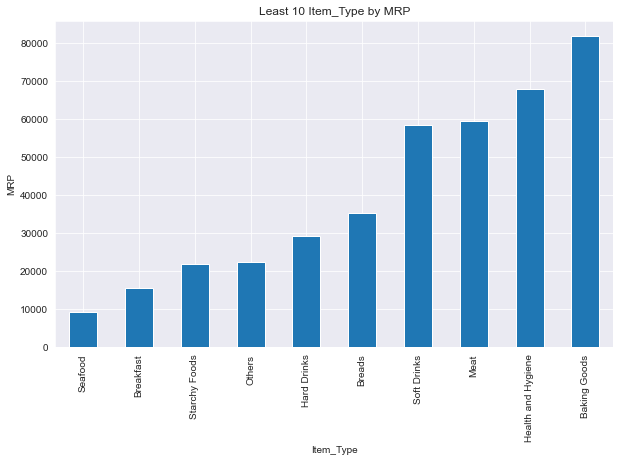

In [171]:
for i in cat_cols:
    if train_df[i].nunique()>10:
        plt.figure(figsize=(10,6))
        train_df.groupby(i).apply(lambda df:df['Item_MRP'].sum()).sort_values(ascending=True).head(10).plot.bar()
        plt.title(f'Least 10 {i} by MRP')
        plt.xticks(rotation=90)
        plt.ylabel('MRP')
    else:
        pass

### <u> Top 10 Categorical Features by MRP </u>

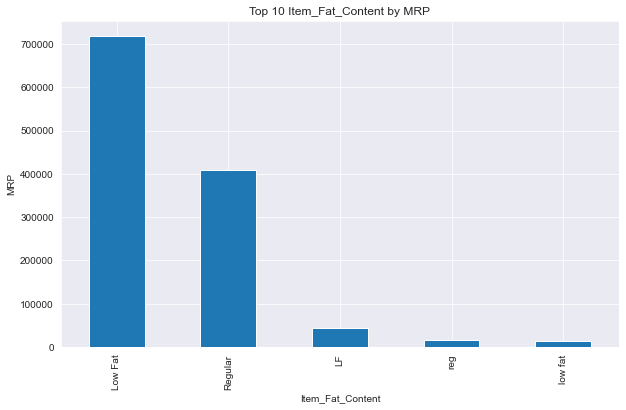

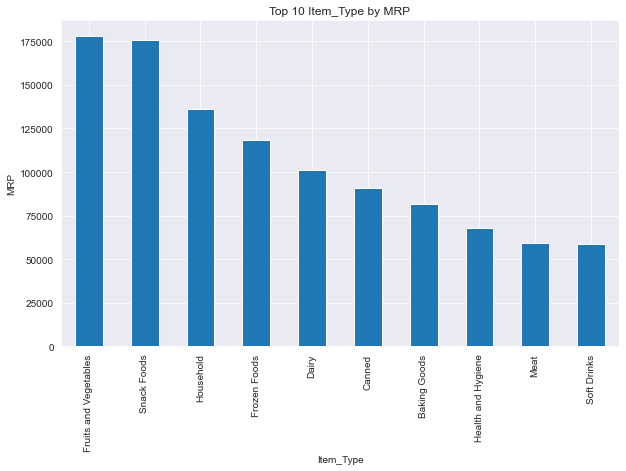

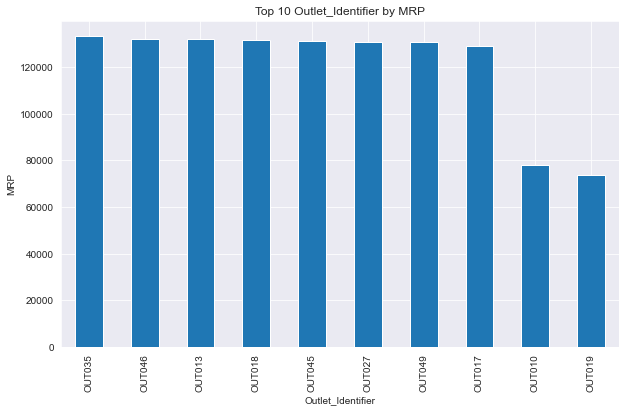

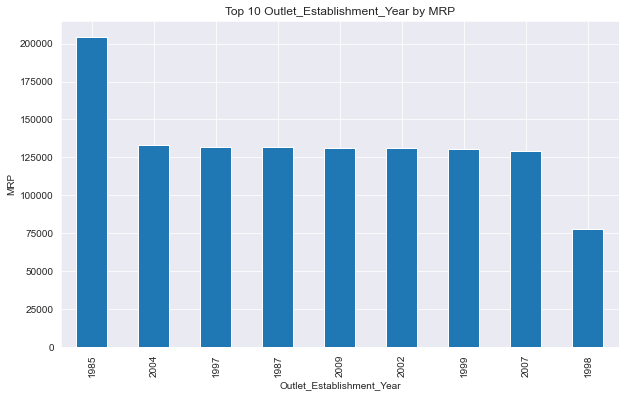

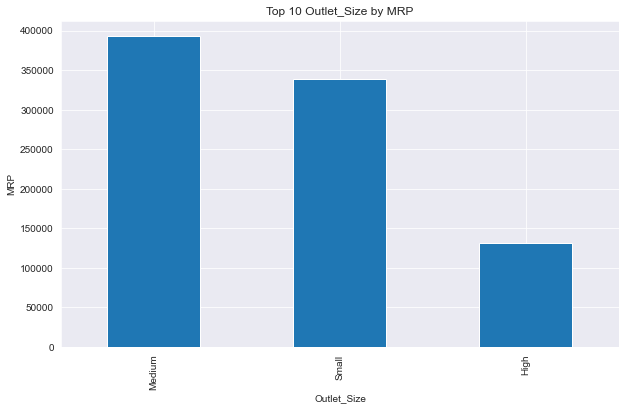

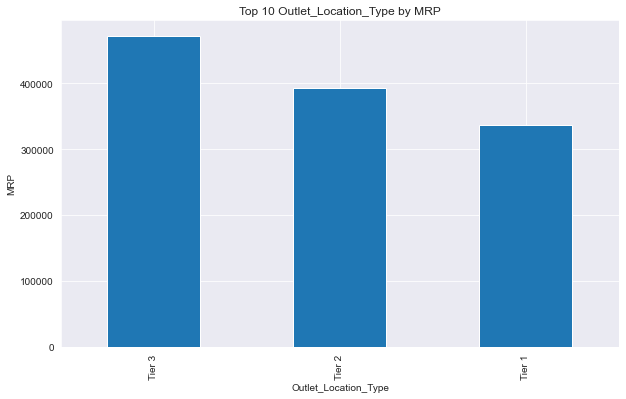

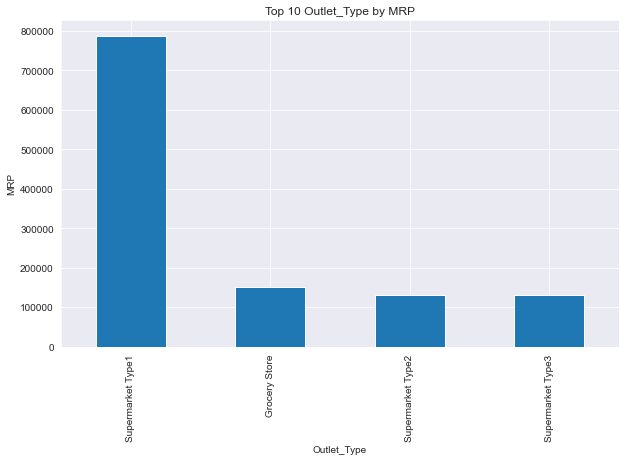

In [172]:
for i in cat_cols:
    plt.figure(figsize=(10,6))
    train_df.groupby(i).apply(lambda df:df['Item_MRP'].sum()).sort_values(ascending=False).head(10).plot.bar()
    plt.title(f'Top 10 {i} by MRP')
    plt.xticks(rotation=90)
    plt.ylabel('MRP')

## <u><strong> Data Preprocessing </strong></u>

In [173]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   object 
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 732.6+ KB


In [174]:
train_df['Outlet_Establishment_Year']=pd.to_datetime(train_df['Outlet_Establishment_Year'])

test_df['Outlet_Establishment_Year']=pd.to_datetime(test_df['Outlet_Establishment_Year'])

In [175]:
## Missing Values 

train_df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [176]:
train_df['Outlet_Size'].fillna(method='ffill',inplace=True)

test_df['Outlet_Size'].fillna(method='bfill',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Baking Goods'),
  Text(1, 0, 'Breads'),
  Text(2, 0, 'Breakfast'),
  Text(3, 0, 'Canned'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Frozen Foods'),
  Text(6, 0, 'Fruits and Vegetables'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Health and Hygiene'),
  Text(9, 0, 'Household'),
  Text(10, 0, 'Meat'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Seafood'),
  Text(13, 0, 'Snack Foods'),
  Text(14, 0, 'Soft Drinks'),
  Text(15, 0, 'Starchy Foods')])

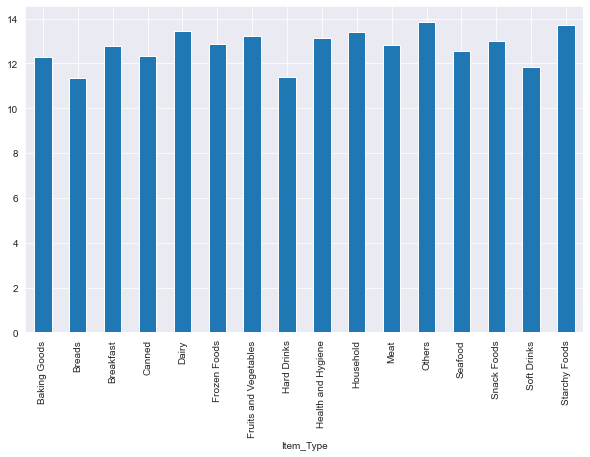

In [177]:
plt.figure(figsize=(10,6))
train_df.groupby('Item_Type').apply(lambda df:df['Item_Weight'].mean()).plot.bar()
plt.xticks(rotation=90)

In [178]:
avg_weight=train_df['Item_Weight'].mean()

In [179]:
train_df['Item_Weight'].fillna(value=avg_weight,inplace=True)

test_df['Item_Weight'].fillna(value=avg_weight,inplace=True)

In [180]:
train_df.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:xlabel='Item_Visibility'>

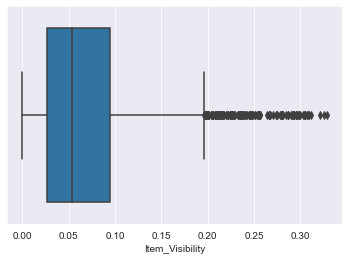

In [181]:
## Outlier Treatment

sns.boxplot(x='Item_Visibility',data=train_df)

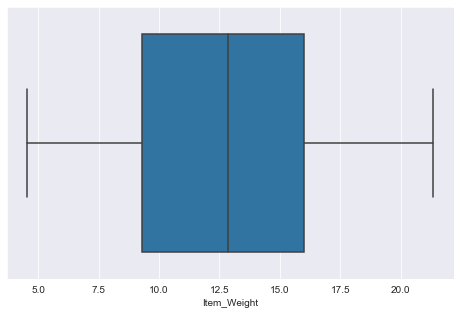

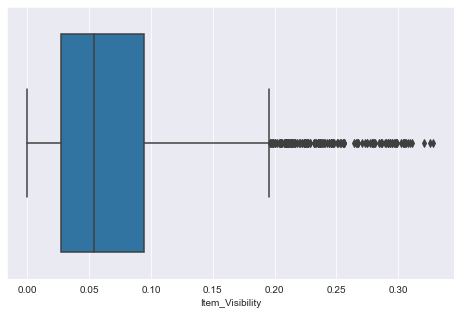

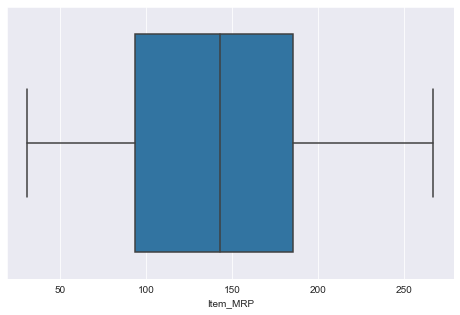

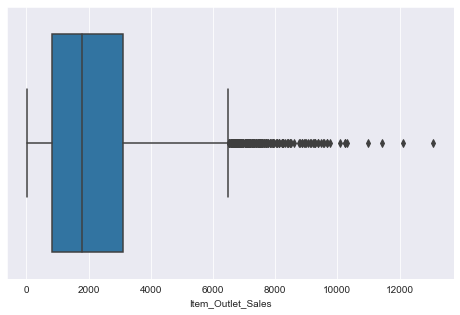

In [182]:
for i in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=i,data=train_df)

In [183]:
def lim(x):
    sorted(x)
    Q1,Q3=np.percentile(x,[25,75])
    IQR=Q3-Q1
    
    up=Q3+(IQR*1.5)
    low=Q1-(IQR*1.5)
    return up,low

u,l=lim(train_df['Item_Visibility'])

u1,l1=lim(train_df['Item_Outlet_Sales'])

In [184]:
train_df['Item_Visibility'] = np.where(
    train_df['Item_Visibility'] > u,
    u,
    np.where(
        train_df['Item_Visibility'] < l,
        l,
        train_df['Item_Visibility']
    )
)

In [185]:
train_df['Item_Outlet_Sales'] = np.where(
    train_df['Item_Outlet_Sales'] > u1,
    u1,
    np.where(
        train_df['Item_Outlet_Sales'] < l1,
        l1,
        train_df['Item_Outlet_Sales']
    )
)

<AxesSubplot:xlabel='Item_Visibility'>

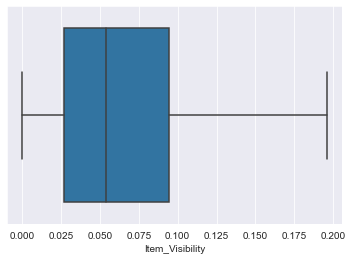

In [186]:
sns.boxplot(x='Item_Visibility',data=train_df)

## <u><strong> Feature Engineering </strong></u>

In [187]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998-01-01,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,994.7052


In [188]:
train_df.drop(labels=['Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Identifier'],axis=1,inplace=True)

test_df.drop(labels=['Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Identifier'],axis=1,inplace=True)

In [189]:
X=train_df.drop('Item_Outlet_Sales',axis=1)

y=train_df['Item_Outlet_Sales']

In [190]:
x_cat=[col for col in X.columns if X[col].dtype=='O']

In [191]:
## Encoding Categorical Data

X=pd.get_dummies(data=X,columns=x_cat,drop_first=True)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5.92,0.019278,48.2692,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,19.20,0.000000,182.0950,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8.93,0.000000,53.8614,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [192]:
x=pd.get_dummies(data=test_df,columns=x_cat,drop_first=True)
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,8.300000,0.038428,87.3198,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,14.600000,0.099575,241.7538,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,7.315000,0.015388,155.0340,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,12.857645,0.118599,234.2300,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [193]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## <u><strong> Machine Learning Models</strong></u>

In [194]:
## Importing models 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [195]:
## Evaluation metrics

from sklearn.metrics import r2_score,mean_squared_error

In [196]:
def fit_model(model):
    m=model()
    m.fit(X_train,y_train)
    return m.predict(X_test)

In [197]:
def evaluate_model(y_test,y_pred):
    print(f'R2 Score : {round(r2_score(y_test,y_pred)*100,2)}')
    print(f'RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}')
    

## <u><strong> Linear Regression </strong></u>

In [198]:
y_pred_lr=fit_model(LinearRegression)

In [142]:
evaluate_model(y_test,y_pred_lr)

R2 Score : 57.91
RMSE : 1069.5413084285133


## <u><strong> Stochastic Gradient Descent </strong></u>

In [199]:
y_pred_sgd=fit_model(SGDRegressor)

In [200]:
evaluate_model(y_test,y_pred_sgd)

R2 Score : -2.26719063209528e+20
RMSE : 2382648955307.4263


## <u><strong> Decision Tree </strong></u>

In [201]:
y_pred_dt=fit_model(DecisionTreeRegressor)

In [202]:
evaluate_model(y_test,y_pred_dt)

R2 Score : 20.8
RMSE : 1408.2676361153506


## <u><strong> Ada Boost </strong></u>

In [203]:
y_pred_ada=fit_model(AdaBoostRegressor)

In [204]:
evaluate_model(y_test,y_pred_ada)

R2 Score : 49.07
RMSE : 1129.3074391680516


## <u><strong> Xgboost </strong></u>

In [205]:
y_pred_xgb=fit_model(XGBRegressor)

In [206]:
evaluate_model(y_test,y_pred_xgb)

R2 Score : 53.85
RMSE : 1075.0265723566583
